# Shipt - Interview Challenge - Data Analyst
  ## _Julian Ibarra_
  ## _9/19/2020_

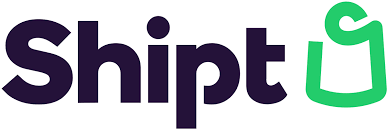

In [2]:
# Import required libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

import datetime as dt

import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score

import json

In [3]:
# Set working directory and input data into dataframes
os.chdir("/Users/jiibarra47/Documents/Data")

cost_data = pd.read_csv("InterviewData_Cost.csv")
rev_data = pd.read_csv("InterviewData_Rev.csv")
activity_data = pd.read_csv("InterviewData_Activity.csv")

parsing_data = pd.read_csv("InterviewData_Parsing.csv")

### Question 1: Join these two data sets by “date” and “source_id”, returning all rows from both regardless of whether there is a match between the two data sets.

In [4]:
# Take a peek at both dataframes and each columns datatype.
cost_data.head(10)

,date,source_id,cost
0,10/17/14,PA0577,7168.0
1,8/17/14,PA0354,7615.0
2,1/7/14,PA0607,4054.0
3,8/25/14,PA0745,9317.0
4,11/30/14,PA0923,5586.0
5,12/22/14,PA0808,8049.0
6,12/17/14,PA0952,6662.0
7,5/22/14,PA0411,4795.0
8,7/7/14,PA0526,2691.0
9,10/14/14,PA0168,9651.0


In [5]:
cost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
date         10000 non-null object
source_id    10000 non-null object
cost         9900 non-null float64
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


In [6]:
rev_data.head(10)

,date,source_id,revenue
0,8/1/14,PA0368,5717.0
1,1/31/14,PA0277,1380.0
2,6/9/14,PA0745,7535.0
3,9/1/14,PA0751,2868.0
4,3/12/14,PA0859,10757.0
5,8/10/14,PA0470,9988.0
6,9/4/14,PA0482,9389.0
7,12/6/14,PA0482,2744.0
8,6/2/14,PA0830,859.0
9,2/11/14,PA0958,4132.0


In [7]:
rev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
date         10000 non-null object
source_id    10000 non-null object
revenue      9921 non-null float64
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


In [8]:
# View the size/shape of inputs and outputs to the merge command
print("cost_data dimensions: {}".format(cost_data.shape))
print("rev_data dimensions: {}".format(rev_data.shape))

cost_data dimensions: (10000, 3)
rev_data dimensions: (10000, 3)


In [9]:
# Merge both data sets by the "date" and "source_id" columns
joined_data = pd.merge(cost_data, rev_data,
                      on = ["date", "source_id"],
                      how = "outer")
joined_data.head(15)

,date,source_id,cost,revenue
0,10/17/14,PA0577,7168.0,8417.0
1,8/17/14,PA0354,7615.0,4200.0
2,1/7/14,PA0607,4054.0,7935.0
3,8/25/14,PA0745,9317.0,5536.0
4,11/30/14,PA0923,5586.0,NaN
5,12/22/14,PA0808,8049.0,3573.0
6,12/17/14,PA0952,6662.0,NaN
7,5/22/14,PA0411,4795.0,NaN
8,7/7/14,PA0526,2691.0,5311.0
9,10/14/14,PA0168,9651.0,NaN


### Question 2: Join these two data sets by “date” and “source_id”, returning only the rows from the “Cost” file that have no corresponding date in the “Revenue” file.

In [15]:
joined_data[joined_data['revenue'].isnull()].head(30)

,date,source_id,cost,revenue,month
4,11/30/14,PA0923,5586.0,NaN,11
6,12/17/14,PA0952,6662.0,NaN,12
7,5/22/14,PA0411,4795.0,NaN,5
9,10/14/14,PA0168,9651.0,NaN,10
10,2/13/14,PA0354,2752.0,NaN,2
12,11/23/14,PA0277,5691.0,NaN,11
13,11/27/14,PA0057,7423.0,NaN,11
16,3/29/14,PA0552,7894.0,NaN,3
20,4/3/14,PA0619,4288.0,NaN,4
22,8/21/14,PA0552,4653.0,NaN,8


### Question 3a: What are the Top 4 sources (“source_id” values) in terms of total revenue generation across this data set?

In [11]:
rev_sum = joined_data.groupby('source_id')['revenue'].sum()
top_id = rev_sum.sort_values(ascending = False).head(4)
top_id

source_id
PA0527    1385747.0
PA0308    1338615.0
PA0352    1309685.0
PA0552    1283190.0
Name: revenue, dtype: float64

The top 4 "source_id" with the highest total revenues are PA0527, PA0308, PA0352, and PA0552.

### Question 3b: How would you visualize the monthly revenue for those Top 4 sources?

In [12]:
# Add "month" column to joined_data, and aggregate total revenue for each source_id by month.
joined_data['month'] = pd.DatetimeIndex(joined_data['date']).month
month_rev = joined_data.groupby(['source_id','month']).sum()[['revenue']].reset_index()

# Filter month_rev data to top 4 source_id's with highest total income.
top_four = month_rev.loc[(month_rev['source_id'] == 'PA0527') | (month_rev['source_id'] == 'PA0308') |
                        (month_rev['source_id'] == 'PA0352') | (month_rev['source_id'] == 'PA0552')]

### Visualize the top revenue sources month over month for 2014.

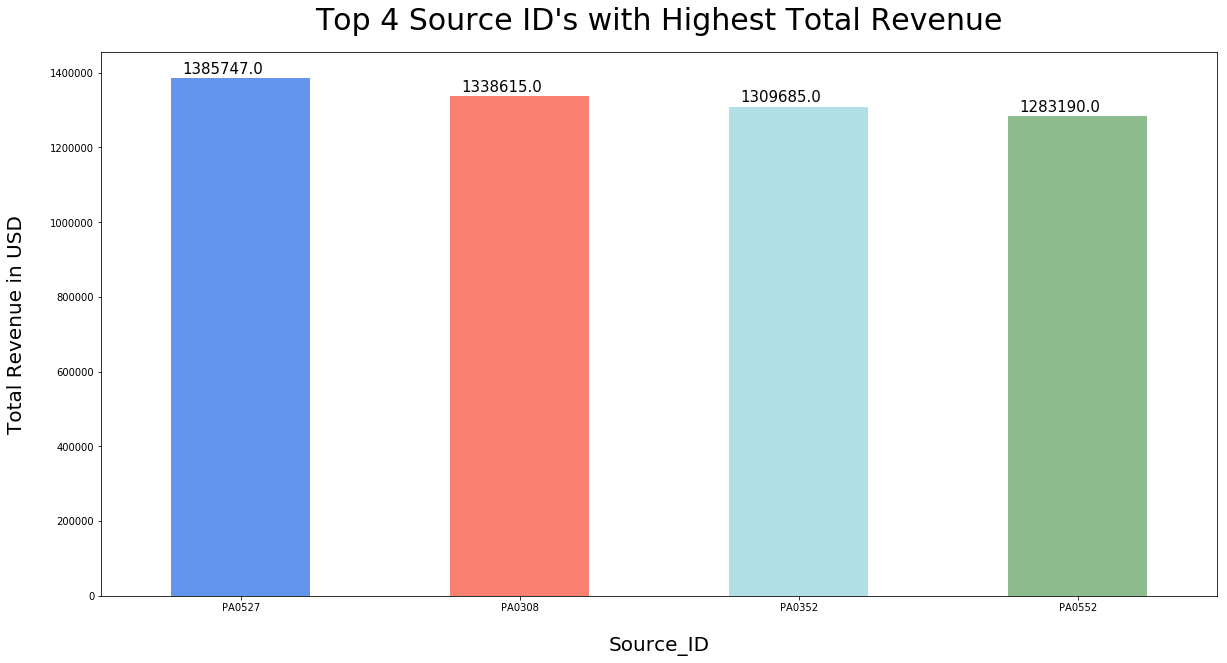

In [13]:
# Visualize the top 4 revenue Source ID's.
ax = top_id.plot(kind='bar', figsize=(20,10),
           color=['cornflowerblue','salmon','powderblue','darkseagreen'],
           rot=0)
plt.title("Top 4 Source ID's with Highest Total Revenue", y = 1.03, fontsize=30) 
plt.xlabel("Source_ID", labelpad=24, fontsize=20) 
plt.ylabel("Total Revenue in USD", labelpad=24, fontsize=20)

# Display top values 
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()+12000, \
           str(round((i.get_height()), 2)), fontsize=15, color='black')

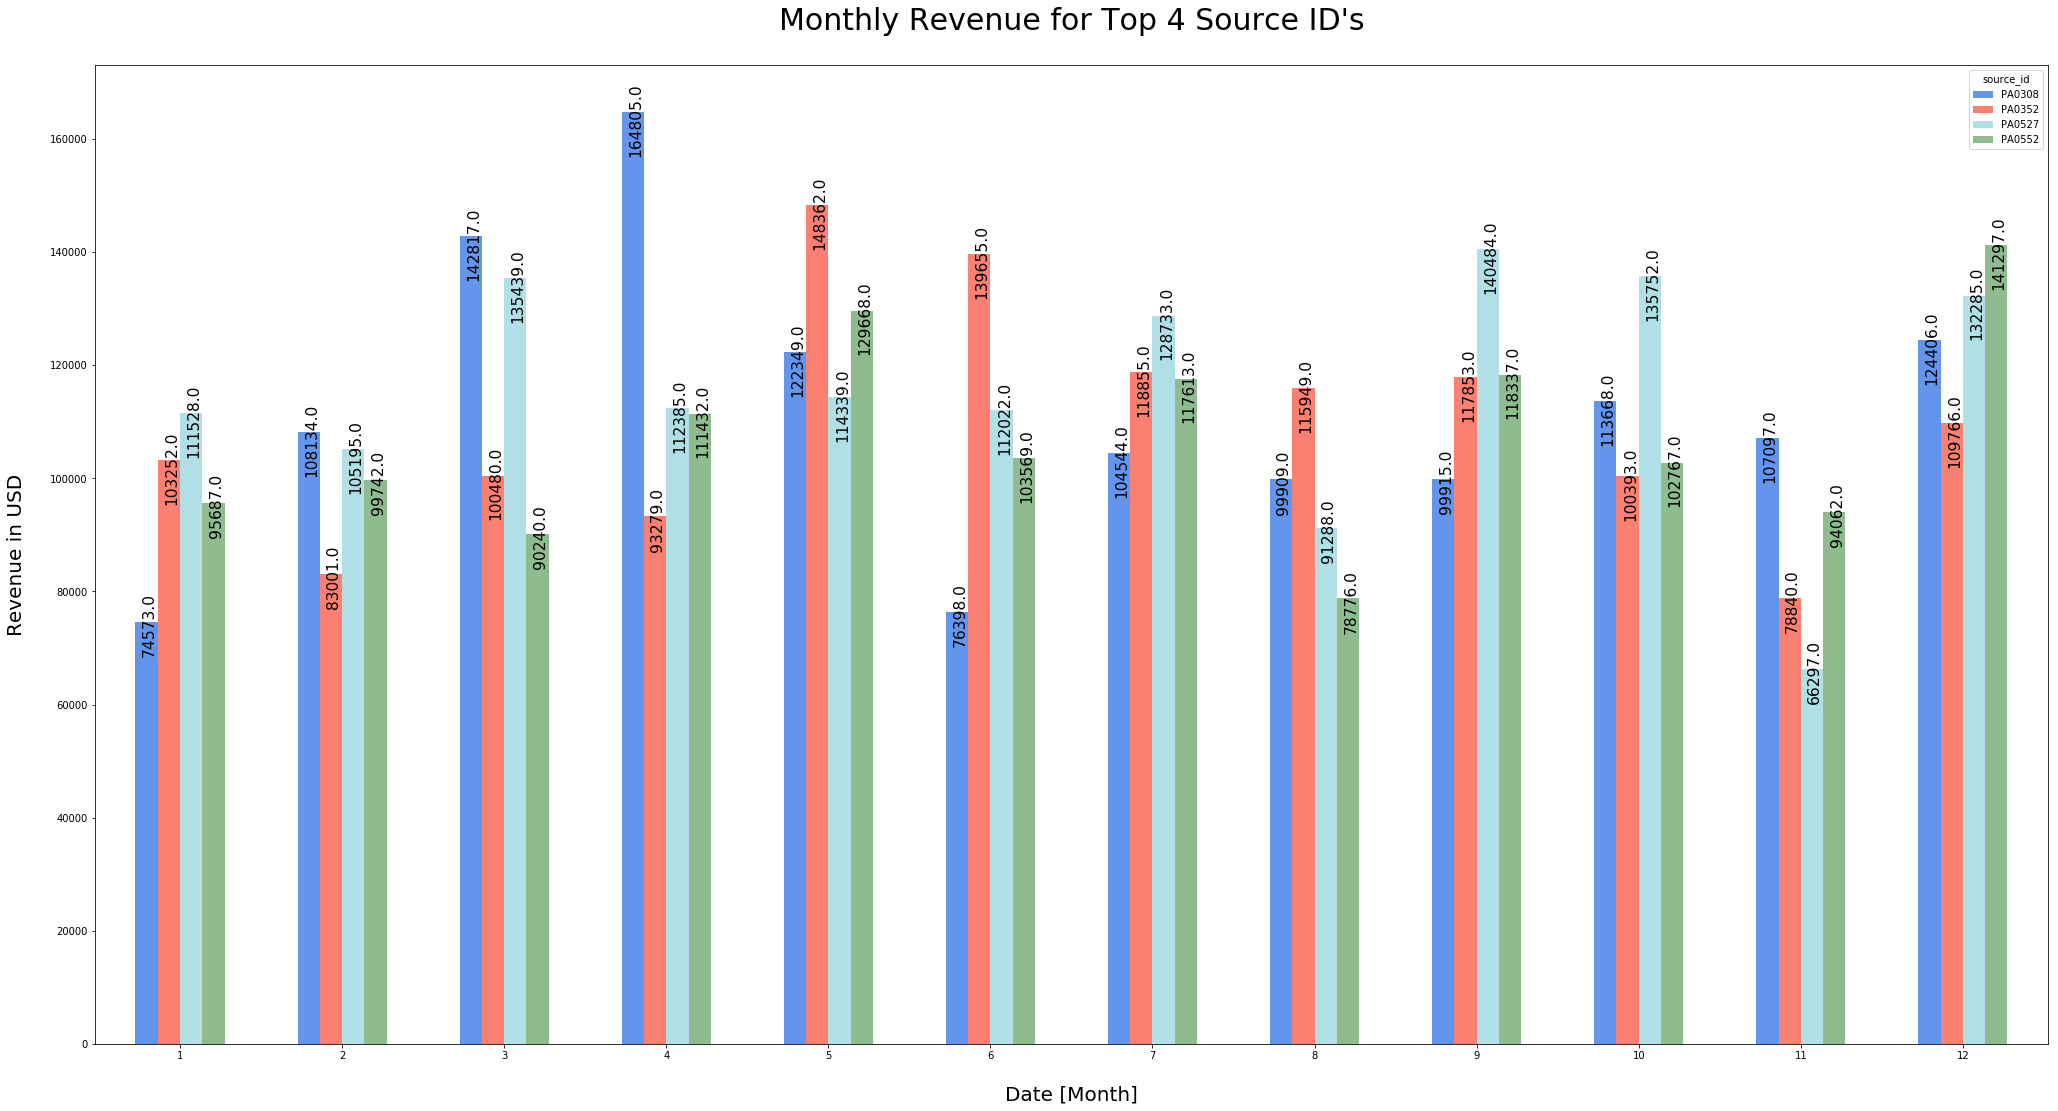

In [14]:
# Visualize monthly revenues for top 4 sources.
ax = top_four.pivot(index = 'month', columns = 'source_id', values = 'revenue').plot(kind='bar', 
                                                figsize=(35, 18), 
                                                color=['cornflowerblue','salmon','powderblue','darkseagreen'],
                                                width = 0.55,
                                                rot=0)  

plt.title("Monthly Revenue for Top 4 Source ID's", y = 1.03, fontsize=30) 
plt.xlabel("Date [Month]", labelpad=24, fontsize=20) 
plt.ylabel("Revenue in USD", labelpad=24, fontsize=20)

#Display top values
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()+3000, \
           str(round((i.get_height()), 1)), fontsize=15.5, color='black',
           rotation = 90)

Bar charts are the best way to visualize monthly revenue for the Top 4 sources. They allow for comparison between different groups and can track changes over time. 

### Question 4: Assuming you’ve read the data into an R object called activity_data, run the following code to build a basic logistic regression model:

In [243]:
# Create dummy variables for "gender", "metropolitan_area", and "device_type"
dummy_genders = pd.get_dummies(activity_data['gender'], prefix = 'gender')
dummy_metro = pd.get_dummies(activity_data['metropolitan_area'], prefix = 'metro_area')
dummy_device = pd.get_dummies(activity_data['device_type'], prefix = 'device')

cols_to_keep = ['active', 'age']
activity_data = activity_data[cols_to_keep].join(dummy_genders.loc[:, 'gender_M':])
activity_data = activity_data.join(dummy_metro.loc[:, 'metro_area_Birmingham':])
activity_data = activity_data.join(dummy_device.loc[:, 'device_Mobile':])
activity_data = sm.add_constant(activity_data, prepend=False)
explanatory_cols = activity_data.columns[1:]
# Build a basic regression model and fit the model to "activity_data"
full_logit_model = sm.GLM(activity_data['active'],
                          activity_data[explanatory_cols],
                          family=sm.families.Binomial())
result = full_logit_model.fit()

In [244]:
activity_data.head(5)

,active,age,gender_M,metro_area_Birmingham,metro_area_Charlotte,metro_area_Detroit,metro_area_Houston,metro_area_Mobile,metro_area_Nashville,metro_area_Tampa,device_Mobile,device_Tablet,const
0,1,30,0,0,0,1,0,0,0,0,0,1,1.0
1,1,43,0,0,1,0,0,0,0,0,0,0,1.0
2,1,41,0,0,0,0,0,0,0,1,1,0,1.0
3,1,56,0,0,0,0,0,0,1,0,0,0,1.0
4,1,33,0,0,0,1,0,0,0,0,1,0,1.0


In [245]:
# Print the results of the Generalized Linear Reg Model.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 5420
Model:                            GLM   Df Residuals:                     5408
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3613.1
Date:                Mon, 21 Sep 2020   Deviance:                       7226.3
Time:                        05:23:04   Pearson chi2:                 5.38e+03
No. Iterations:                    22   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       0.0136      0.003      5.180      0.000       0.008       0.019
gender_M                 -0.6103      0.083     -7.343      0.000      -0.773      -0.447
metro_area_Birmingham    -0.0547      0.095     -0.576      0.564      -0.241       0.131
metro_area_Charlotte     -1.8619      0.337     -5.529      0.000      -2.522      -1.202
metro_area_Detroit       -0.0792      0.115     -0.689      0.491      -0.304       0.146
metro_area_Houston       -0.4496      0.093     -4.850      0.000      -0.631      -0.268
metro_area_Mobile        -1.7244      0.259     -6.655      0.000      -2.232      -1.217
metro_area_Nashville     22.4506   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
metro_area_Tampa          0.1370      0.104      1.312      0.189      -0.068       0.342
device_Mobile            -1.5004      0.264     -5.685      0.000      -2.018      -0.983
device_Tablet            -1.2342      0.269     -4.585      0.000      -1.762      -0.707
const                     1.1553      0.290      3.991      0.000       0.588       1.723
=========================================================================================
"""

In [257]:
def cm(y_test, x):
    pred_y = []
    for value in result.predict(x).tolist():
        if value >= 0.5:
            pred_y.append(1)
        else:
            pred_y.append(0)

    print(metrics.confusion_matrix(y_test,pred_y))

    print("Accuracy:",metrics.accuracy_score(y_test, pred_y))
    print("Precision:",metrics.precision_score(y_test, pred_y))
    print("Recall:",metrics.recall_score(y_test, pred_y))

In [258]:
cm(activity_data['active'], activity_data[explanatory_cols])

[[1626 1164]
 [1109 1521]]
Accuracy: 0.5806273062730627
Precision: 0.5664804469273743
Recall: 0.5783269961977187


The model had an accuracy of 58% and precision of 56% when it came to predicting active memebers.

### Question 5: Split the data into training and test samples, and build a model over the training data using the following

In [222]:
# Split the data into training and test set; Roughly 65% used for training and 35% used for testing.
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()
# Build a GLM model over the training data
training_logit_model = sm.GLM(training_data['active'],
                              training_data[explanatory_cols],
                              family=sm.families.Binomial())
training_result = training_logit_model.fit()

In [223]:
# Print the results of the Generalized Linear Reg Model.
training_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 3999
Model:                            GLM   Df Residuals:                     3987
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.6
Date:                Mon, 21 Sep 2020   Deviance:                       5109.3
Time:                        05:02:28   Pearson chi2:                 3.97e+03
No. Iterations:                    22   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       0.0071      0.003      2.227      0.026       0.001       0.013
gender_M                 -0.5802      0.097     -5.981      0.000      -0.770      -0.390
metro_area_Birmingham    -0.1187      0.115     -1.037      0.300      -0.343       0.106
metro_area_Charlotte     -1.7834      0.382     -4.663      0.000      -2.533      -1.034
metro_area_Detroit       -0.1390      0.138     -1.007      0.314      -0.409       0.132
metro_area_Houston       -0.4865      0.112     -4.358      0.000      -0.705      -0.268
metro_area_Mobile        -1.7606      0.284     -6.202      0.000      -2.317      -1.204
metro_area_Nashville     21.8608   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
metro_area_Tampa          0.1892      0.127      1.484      0.138      -0.061       0.439
device_Mobile            -1.5818      0.291     -5.428      0.000      -2.153      -1.011
device_Tablet            -1.2830      0.298     -4.309      0.000      -1.867      -0.699
const                     2.0245      0.327      6.187      0.000       1.383       2.666
=========================================================================================
"""

In [231]:
cm(test_data['active'], test_data[explanatory_cols])

[[787 503]
 [ 53  76]]
Accuracy: 0.6081747709654687
Precision: 0.13126079447322972
Recall: 0.5891472868217055


### Assess the training data model’s accuracy on the test data. Why does the accuracy change so much?

The model actually performed better on the test set, with an accuracy of 61%. The higher accuracy on the second model could be due to the dataset split not being randomly selected. Because of this, the test set could be containing less variance, leading to an easier prediction and a higher accuracy. Some other potential reasons could be that there are far too many model features and the dataset is too small not allowing the model to properly generalize.

Potential ways to mitigate this issue include: feature engineering, reducing the number of features, adding more data, or using k-fold cross validation to reduce model bias due to limited data set.

### Question 6: This data comes from a subset of userdata JSON blobs stored in our database. Parse out the values (stored in the “data_to_parse” column) into four separate columns. So for example, the four additional columns for the first entry would have values of “N”, “U”, “A7”, and “W”. 

In [385]:
parsing_data.head()

,userid,data_to_parse
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]"
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]"
2,54f650f004474,"""value"":""Y;U;A7;W""}]"
3,54f52e8872227,"""value"":""N;U;I1;W""}]"
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]"


In [463]:
x = ("{" + parsing_data["data_to_parse"].str.strip("]")).apply(pd.io.json.loads)
df = x.str["value"].str.split(";", expand=True)
new_parse = pd.concat([parsing_data, df], axis=1)
# Show first 15 rows of code after parsed column
new_parse.head(15)

,userid,data_to_parse,0,1,2,3
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]",N,U,A7,W
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]",N,U,I6,W
2,54f650f004474,"""value"":""Y;U;A7;W""}]",Y,U,A7,W
3,54f52e8872227,"""value"":""N;U;I1;W""}]",N,U,I1,W
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]",Y,U,A7,W
5,54f69dc01793f,"""value"":""N;U;A1;W""}]",N,U,A1,W
6,54f5d26833ce6,"""value"":""N;U;A1;W""}]",N,U,A1,W
7,54f52b1a7e647,"""value"":""N;U;A4;W""}]",N,U,A4,W
8,54f4ae7da8d01,"""value"":""N;U;A1;W""}]",N,U,A1,W
9,54f6290ca187d,"""value"":""N;U;U;W""}]",N,U,U,W


## Additional Questions – Pick One

### Question B:

#### One of the ways we attract new members is through digital marketing campaigns (e.g., on Facebook). Assume that we know a little bit about potential users who see an ad for Shipt on Facebook – things like name and general metropolitan area, and then can measure the impressions on the ad, clicks to our landing page, and then conversions on our landing page. Our goal then is to drive more conversions on the landing page. What are some ways you might look at the already collected data (or some ways to enrich the existing data set) to try and make recommendations to the Marketing team for how to optimize their campaigns?

In the problem statement, the goal is to attract new users to Shipt through sponsored marketing advertisements on Facebook and other digital media platforms. We are provided with the user's name and metropolitan area, and whether or not there was a successful conversion to the landing page. In order to make good recommendations, it’s very important that we have an in-depth understanding of potential new member demographics and website/application flow behaviors.

My first recommendation would be to perform trend analysis on historical data based on segmented metropolitan areas and newly collected demographics data (sex, age, income, education). We would want to determine if the traffic source, marketing channel, and other various metrics are improving or deteriorating over time after initiating the Facebook campaign. Doing this would not only allow us to better understand our target audience but also understand which member base we need to be more heavily invested in. 

Another potential route is using the collected data on clicks/conversions to better understand visitor's behavior flow. Having a better understanding of which website pages have low or high drops offs will allow the team to determine if changes need to be made either to the advertisement or website to increase landing page conversions. Some areas to keep an eye on include: point of entry (Facebook ad), first engagement on the website, second engagement and beyond, and finally bounce factor.

Finally, one of the most important tasks for improving digital campaign marketing is to perform an A/B split test. After we have a thorough understanding of which member demographics to focus on, and the ads that provide the most impressive behavior flow, we can then make modifications to whichever ad's need improvement. We continue to collect data after the changes and measure the statistical differences between the control and variation. A/B testing can be used reliably to continuously improve a given experience and help determine which ad elements provide better conversion rates. This method of introducing changes to a user experience also allows the occurrence to be optimized for a desired outcome and can deliver crucial steps in making digital marketing campaigns more successful.

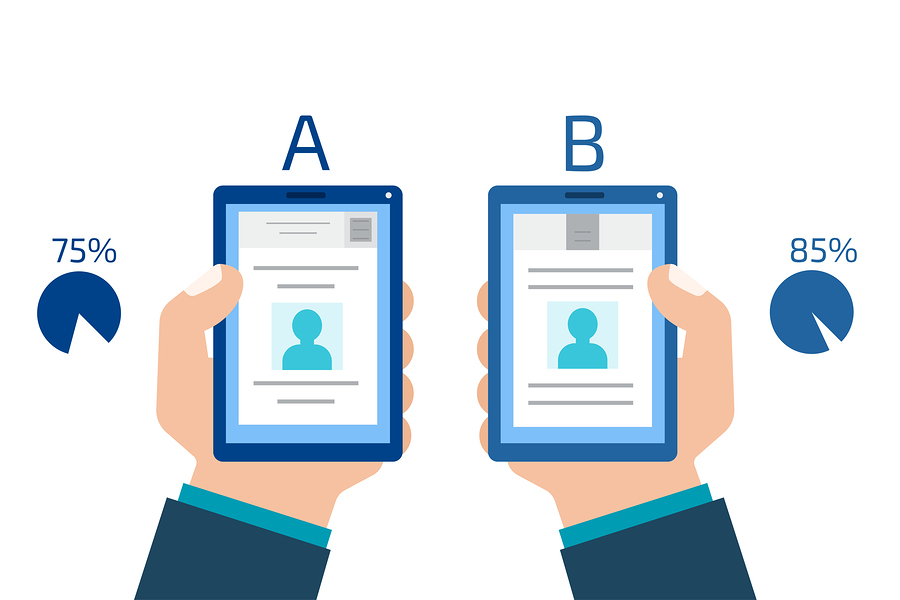